In [1]:
%cd ~/cma/CMA_Fairness_v2

/dss/dsshome1/0C/ra93lal2/cma/CMA_Fairness_v2


/dss/dsshome1/0C/ra93lal2/.local/share/virtualenvs/CMA_Fairness_v2-3j10GkSs/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/dss/dsshome1/0C/ra93lal2/.local/share/virtualenvs/CMA_Fairness_v2-3j10GkSs/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /dss/dsshome1/0C/ra93lal2/cma/CMA_Fairness_v2


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
RUN_TO_ANALYSE = "11"
CP_DIR = Path("output") / "runs" / str(RUN_TO_ANALYSE)

df = pd.read_csv(CP_DIR / "combined_cp_metrics.csv")

In [10]:
cols = ['coverage', 'cov_frau1', 'cov_nongerman', 'cov_nongerman_male', 'cov_nongerman_female']

In [11]:
df_sub = df[cols]

In [12]:
df_sub

,coverage,cov_frau1,cov_nongerman,cov_nongerman_male,cov_nongerman_female
0,0.912351,0.911794,0.910459,0.925786,0.885097
1,0.912919,0.913438,0.942402,0.951545,0.927273
2,0.910746,0.909449,0.912873,0.927047,0.889419
3,0.911637,0.910446,0.927918,0.941818,0.904918
4,0.910679,0.912360,0.908831,0.923264,0.884948
...,...,...,...,...,...
395,0.912373,0.911848,0.910571,0.925786,0.885395
396,0.909977,0.909341,0.910066,0.925786,0.884054
397,0.911637,0.910446,0.927918,0.941818,0.904918
398,0.913165,0.911875,0.951103,0.959741,0.936811


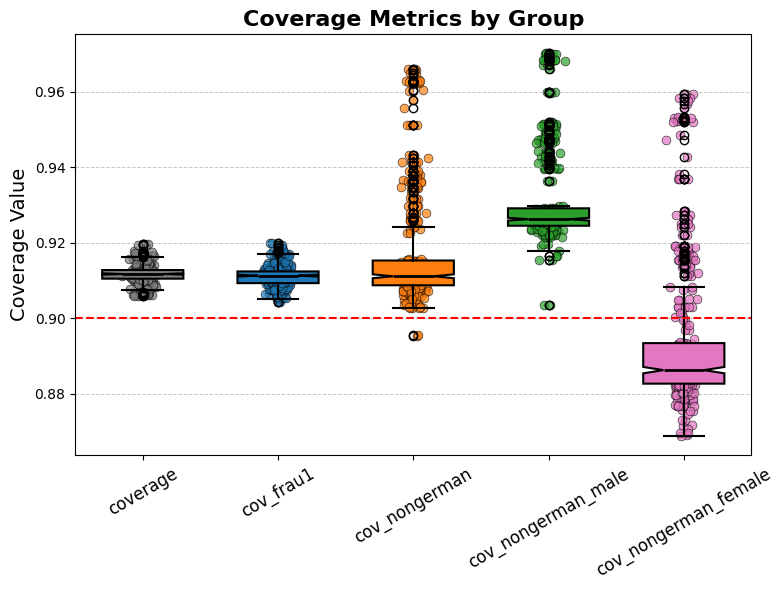

In [16]:
# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Positions for each box
positions = np.arange(1, len(cols) + 1)

# Draw the boxplots
bp = ax.boxplot(
    [df_sub[col] for col in cols],
    positions=positions,
    widths=0.6,
    patch_artist=True,
    notch=True
)

# Define a distinct color per box (you can swap these for any mpl named colors)
colors = ["tab:grey", "tab:blue", "tab:orange", "tab:green", "tab:pink"]

# Style the boxes and medians
for patch, median, color in zip(bp["boxes"], bp["medians"], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
    patch.set_linewidth(1.5)
    median.set_color("black")
    median.set_linewidth(2)

# Style whiskers and caps
for whisker in bp["whiskers"]:
    whisker.set_color("black")
    whisker.set_linewidth(1.5)
for cap in bp["caps"]:
    cap.set_color("black")
    cap.set_linewidth(1.5)

# Overlay the actual data points with a little horizontal jitter
for i, col in enumerate(cols):
    y = df_sub[col]
    x = np.random.normal(positions[i], 0.04, size=len(y))
    ax.scatter(
        x,
        y,
        alpha=0.7,
        color=colors[i],
        edgecolors="black",
        linewidths=0.5,
        s=40
    )

# Add a horizontal line at coverage = 0.90
ax.axhline(y=0.90, color='red', linestyle='--', linewidth=1.5, label='Target coverage = 0.90')

# Add a light grid
ax.yaxis.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

# Labels and ticks
ax.set_xticks(positions)
ax.set_xticklabels(cols, rotation=30, fontsize=12)
ax.set_ylabel("Coverage Value", fontsize=14)
ax.set_title("Coverage Metrics by Group", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()